In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [41]:
data = pd.read_csv('../data/dataset.csv')
data.head()

,Feature1,Feature2,Feature3,Target
0,0.751846,98.791871,814.311366,1
1,0.797863,79.901070,497.720167,1
2,0.991586,91.421082,36.282736,1
3,0.016990,3.730573,879.821470,0
4,0.370750,16.721799,669.223844,1


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
X = data.drop(columns=['Target'])
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training sample size: {X_train.shape}")
print(f"Test sample size: {X_test.shape}")

Training sample size: (1600, 3)
Test sample size: (400, 3)


In [44]:
data.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64

In [45]:
from train_models import train_models
from evaluate import evaluate_models

trained_models = train_models(X_train, y_train)

results = evaluate_models(trained_models, X_test, y_test)

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.5225   0.521789  0.5225  0.506034
1        Decision Tree    0.4650   0.465290  0.4650  0.465040
2        Random Forest    0.4700   0.469776  0.4700  0.469841
3                  KNN    0.5250   0.525923  0.5250  0.524620


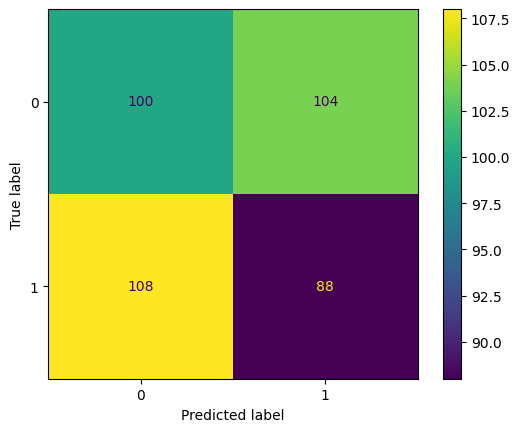

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

best_model = trained_models['Random Forest']
y_pred = best_model.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()
